In [1]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import numpy as np

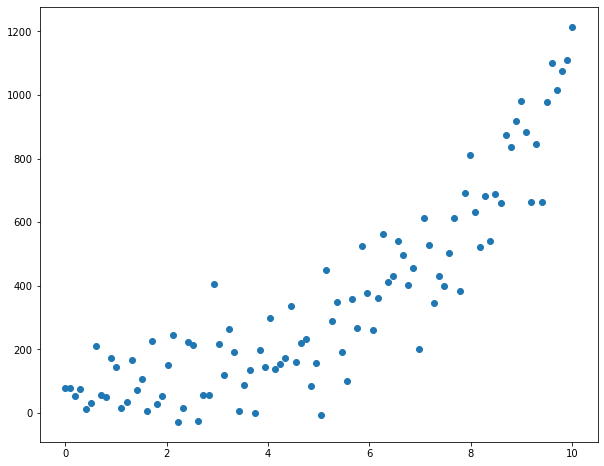

In [2]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100
plt.figure(figsize=(10,8))
plt.scatter(X, y)

In [3]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train = X_train.reshape(-1, 1)

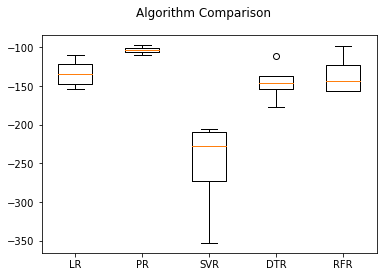

In [4]:
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('PR', LinearRegression()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor(n_estimators = 10)))


# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=4, random_state=seed)
    if name == 'PR':
        poly_reg = PolynomialFeatures(degree = 4)
        X_poly = poly_reg.fit_transform(X_train)
        cv_results = model_selection.cross_val_score(model, X_poly, y_train.ravel(), cv=kfold, scoring=scoring)
    else:
        cv_results = model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)

    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()